In [1]:
import cv2

import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rcParams

%matplotlib inline

In [2]:
rcParams['figure.figsize'] = (15, 15)

### Reducing number of descriptors

In [2]:
all_descrs = np.load('./data/faces_.npy')
n_components = all_descrs.shape[1] - 1
all_descrs = pd.DataFrame(all_descrs, columns=['face_id'] + ['d{}'.format(i) for i in range(n_components)])

In [7]:
N_RANDOM_DESCR = 10

In [8]:
small_descrs = all_descrs.groupby('face_id').apply(lambda x: x.sample(min(len(x), N_RANDOM_DESCR))).reset_index(drop=True)

In [9]:
small_descrs.shape

(993848, 129)

In [14]:
np.save('./data/faces_small.npy', small_descrs.values)

### Clustering

In [8]:
all_descrs = np.load('./data/faces_small.npy')

In [9]:
pca = PCA(n_components=2)

In [14]:
descrs_pca = pca.fit_transform(all_descrs[:1000, 1:])

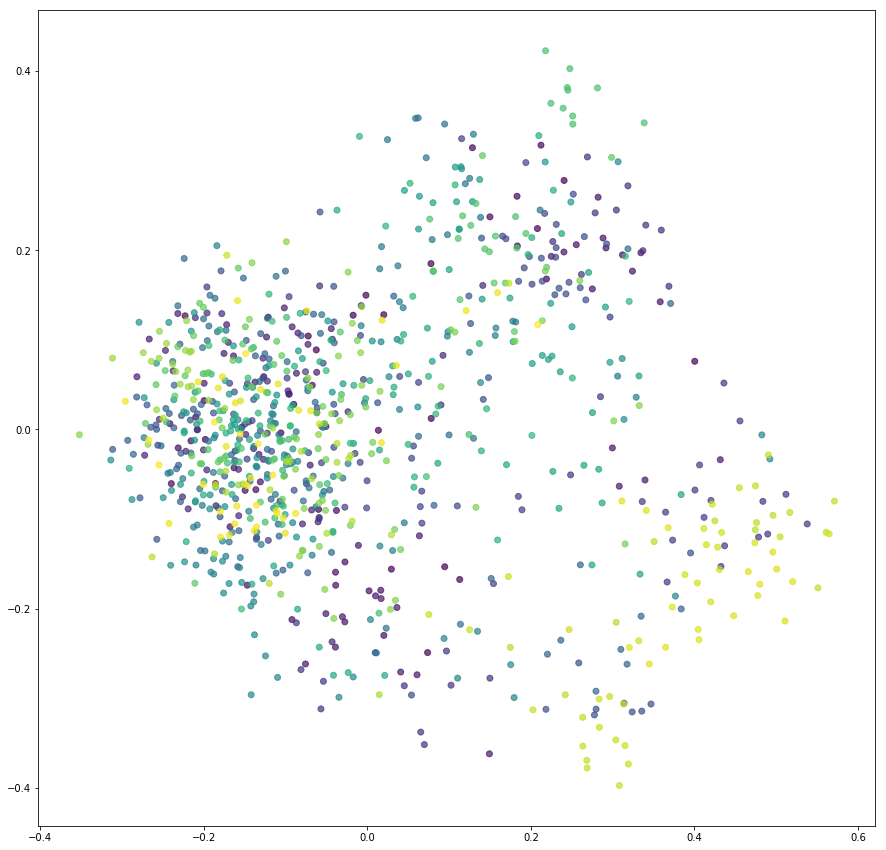

In [16]:
plt.scatter(descrs_pca[:, 0], descrs_pca[:, 1], c=all_descrs[:1000, 0].astype(np.int32), alpha=0.7)

In [17]:
pca = PCA(n_components=10)
pca_descrs = pca.fit_transform(all_descrs[:, 1:])
all_pca_descrs = np.hstack([all_descrs[:, 0][:, np.newaxis], pca_descrs])
np.save('./data/faces_small_10d.npy', all_pca_descrs)